# This notebook explores the HarDataModule

##  1. Instantiating the datamodule object and preparing the data

In [1]:
from data_modules.har import HarDataModule

# Instantiating the HarDataModule with root dir at data/example
my_datamodule = HarDataModule(root_data_dir="data/example", 
                              flatten = True, 
                              target_column = "standard activity code", 
                              batch_size=16)

In [2]:
# Once the object is instantiated, we shall invoke the prepare_data() method to ensure the data is downloaded and extracted at the root_data_dir. Once you execute this command, you may inspect the data/example directory for CSV data files.
my_datamodule.prepare_data()

## 2. Retrieving the training set dataloader (train_dl)

Besides defining the batch size, the data module manages the data loaders for the training, validation, and test partitions. The next command shows how to retrieve the training data loader, i.e., the data loader that provides the training samples.

In [3]:
# Retrieve the training set dataloader (dl)
train_dl = my_datamodule.train_dataloader()

## 3. Exploring the training set dataloader (train_dl)

### Iterating over batches

The training, validation, and the test set data loaders are torch DataLoader objects, hence, they are iterable objects that iterate over batches of data.

For example, the following code prints the number of batches and iterates over the training set batches. At each iteration, it prints the type of the batch.

OBS: The batch size was defined when creating the data module (See the first code box in this notebook).


In [4]:
print(f"There are {len(train_dl)} batches in the training set!")
for batch in train_dl:
    print("- Batch object is of type:", type(batch))

There are 4 batches in the training set!


- Batch object is of type: <class 'list'>
- Batch object is of type: <class 'list'>
- Batch object is of type: <class 'list'>
- Batch object is of type: <class 'list'>


### Inspecting the batch contents

The following code extracts the first batch from the train_dl data loader and inspects its type.

In [5]:
first_batch = next(iter(train_dl))
print("type(first_batch) =", type(first_batch))

type(first_batch) = <class 'list'>


Ok, the batch is a list object. Lets dig a little more and inspect the amount of items in the list.

In [6]:
print("len(first_batch) =", len(first_batch))

len(first_batch) = 2


Ok. It is a list with 2 elements. Let's inspect these elements.

In [7]:
element1 = first_batch[0] # First element
element2 = first_batch[1] # second element

print("type(element1) =", type(element1))
print("type(element2) =", type(element2))

type(element1) = <class 'torch.Tensor'>
type(element2) = <class 'torch.Tensor'>


Both elements are pytorch tensors. Lets see their shape.

In [8]:
print("element1.shape =", element1.shape)
print("element2.shape =", element2.shape)

element1.shape = torch.Size([16, 360])
element2.shape = torch.Size([16])


The first element is a tensor with shape 16 x 360 (or a matrix, if you will) while the second one is a tensor with shape 16 (or a vector with 16 elements, if you will). 

The data module was initialized with batch size = 16, hence, it is expected that each batch contains 16 elements (OBS: This may not be true for the last batch, in case the total number of samples is not a multiple of 16).

By inspecting the number of elements in the list and the shapes of these elements, we can infer that the batch is organized as a list with two elements, the first one contains the input features (or X) for all samples in the batch while the second one contains the labels for all samples in the batch.

Lets inspect the first sample of the batch, but first, lets give more meaninfull names to our variables:

In [9]:
X = batch[0] # Features
y = batch[1] # Labels

X_1 = X[0] # Features of the first sample in the batch
y_1 = y[0] # Label of the first sample in the batch

print("y1: ", y_1)
print("X1: ", X_1)

y1:  tensor(3)
X1:  tensor([-2.7388e+00, -7.2059e-02,  2.6341e+00,  2.0093e+00,  4.3473e+00,
         7.0196e-01,  1.1165e+00,  3.3608e+00, -1.1478e+00, -3.3957e+00,
        -1.9258e+00, -2.9515e-01,  1.7366e+00,  1.6808e+00,  5.5685e+00,
        -8.3065e-01,  5.1829e-01,  2.9726e+00, -3.0489e+00, -2.6190e+00,
        -2.6475e+00, -1.6949e+00,  7.6290e-01,  1.1207e+00,  4.5873e+00,
         2.5799e+00, -1.3402e-01,  2.6220e+00, -2.0234e+00, -3.1237e+00,
        -2.3694e+00, -2.0485e+00, -9.4810e-01, -6.2345e-01,  4.2801e+00,
         3.9343e+00, -4.8309e-01,  2.0989e+00,  3.6656e-01, -3.7855e+00,
        -3.1435e+00, -1.8845e+00, -1.4298e+00, -6.7429e-01,  1.2390e+00,
         1.6358e+00,  5.7076e+00,  1.7996e+00,  5.0287e-01,  2.5026e+00,
        -4.3752e+00, -4.5908e+00, -1.7274e+00, -6.6837e-01,  2.1613e-01,
        -2.6044e-01,  3.4145e+00,  4.8504e+00, -2.4353e-04,  7.5724e-02,
        -1.8351e+00,  4.5727e-01, -2.4209e+00,  1.2074e+00, -2.6245e+00,
         6.2103e-01,  2.8317e+0

The first sample of the batch contains 360 float values while the label is an integer values (5).

The 360 values correspond to the samples collected by Accelerometer and Gyroscope sensors on a smartphone. 

Both the accelerometer and the gyroscope have three axis: x, y, and z. Each one of these register a value after a given interval of time. 
In this dataset, these sensors recorded data for 3 seconds at a rate of 20 Hz, i.e., they recorded 20 values per second.
Hence, each sensor axis registered 60 values, a total of 6x60=360 values.

The first 60 values in the sample correspond to the 60 values sampled by the accelerometer X-axis.
The next 60 values correspond to the 60 values sampled by the accelerometer Y-axis.
The next 60 values correspond to the 60 values sampled by the accelerometer Z-axis.
Finally, the next 180 values correspond to the values sampled by the gyroscope axis.

In orde to inspect these values, lets first convert the tensor to a numpy object and reshape the data from (1x360) to (6x60).

In [10]:
X_1_np = X_1.cpu().numpy().reshape(6,60)
print("X_1_np.shape =", X_1_np.shape)

X_1_np.shape = (6, 60)


In [11]:
print("X_1_np contents\n", X_1_np)

X_1_np contents
 [[-2.73877072e+00 -7.20591992e-02  2.63411427e+00  2.00930929e+00
   4.34732533e+00  7.01956570e-01  1.11654210e+00  3.36078715e+00
  -1.14776039e+00 -3.39568257e+00 -1.92581940e+00 -2.95151949e-01
   1.73656178e+00  1.68076336e+00  5.56850195e+00 -8.30654621e-01
   5.18288493e-01  2.97255731e+00 -3.04890347e+00 -2.61903262e+00
  -2.64746594e+00 -1.69485748e+00  7.62901604e-01  1.12072861e+00
   4.58731747e+00  2.57994556e+00 -1.34017840e-01  2.62204528e+00
  -2.02343702e+00 -3.12374902e+00 -2.36944604e+00 -2.04850125e+00
  -9.48103487e-01 -6.23452306e-01  4.28011465e+00  3.93427658e+00
  -4.83094931e-01  2.09891629e+00  3.66564751e-01 -3.78550649e+00
  -3.14348245e+00 -1.88450980e+00 -1.42981446e+00 -6.74288273e-01
   1.23896623e+00  1.63583279e+00  5.70763111e+00  1.79962897e+00
   5.02867401e-01  2.50256300e+00 -4.37516499e+00 -4.59081030e+00
  -1.72742140e+00 -6.68369174e-01  2.16127455e-01 -2.60442376e-01
   3.41449642e+00  4.85040283e+00 -2.43533403e-04  7.572403

### Number of samples in each batch

In [12]:
train_dl_iterator = iter(train_dl)
number_of_batches = len(train_dl_iterator)
print(f"The train_dl contains {number_of_batches} batches!")

The train_dl contains 4 batches!


In [13]:
for idx, batch in enumerate(train_dl):
    print(f"-- Batch {idx} --")
    X, y = batch
    print("X.shape =", X.shape)
    print("y.shape =", y.shape)

-- Batch 0 --
X.shape = torch.Size([16, 360])
y.shape = torch.Size([16])
-- Batch 1 --
X.shape = torch.Size([16, 360])
y.shape = torch.Size([16])
-- Batch 2 --
X.shape = torch.Size([16, 360])
y.shape = torch.Size([16])
-- Batch 3 --
X.shape = torch.Size([12, 360])
y.shape = torch.Size([12])


Notice that the first three batches contain 16 samples each, while the last one contains 12 samples.

## Plotting the data with matplotlib

Now lets show the data collected by the accelerometer axis on a chart using matplotlib.
Notice that `X_1_np[0]` contains all the values registered by the accelerometer x-axis.

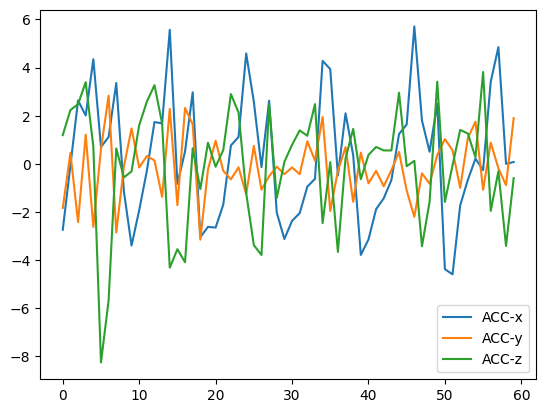

In [14]:
import matplotlib.pyplot as plt
plt.plot(X_1_np[0], label="ACC-x") # Accelerometer x-axis values
plt.plot(X_1_np[1], label="ACC-y") # Accelerometer y-axis values
plt.plot(X_1_np[2], label="ACC-z") # Accelerometer z-axis values
plt.legend()

Now, lets implement a more complete function to visualize a sample from our dataset. 
It will display the data from the accelerometer and the gyroscope on two distinct charts in the same figure.




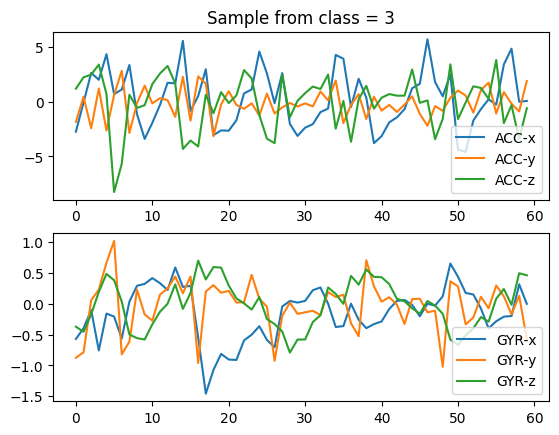

In [15]:
def plot_sample(Xi_np, yi):
    """This function plots a sample of our dataset using matplotlib. 

    Parameters
    ----------
    Xi_np : 
        A 6 x N Numpy array.
    y_i: 
        An integer value indicating the sample class.
    """    
    plt.subplot(2, 1, 1)
    plt.title(f"Sample from class = {yi}")
    plt.plot(Xi_np[0], label = "ACC-x")
    plt.plot(Xi_np[1], label = "ACC-y")
    plt.plot(Xi_np[2], label = "ACC-z")
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.plot(Xi_np[3], label = "GYR-x")
    plt.plot(Xi_np[4], label = "GYR-y")
    plt.plot(Xi_np[5], label = "GYR-z")
    plt.legend()
    plt.show()

# Lets test our function -- plot the first sample from the first batch (X_1, y_1)
plot_sample(X_1_np, y_1)

## Plot all samples from the training dataset

Finally, lets plot all samples from the training dataset.

Once the charts are plotted, inspect their contents and see if you can spot differences between samples from class 0 and class 5.

-- Batch --


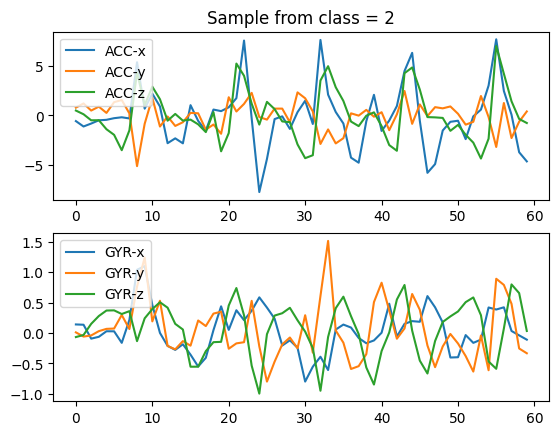

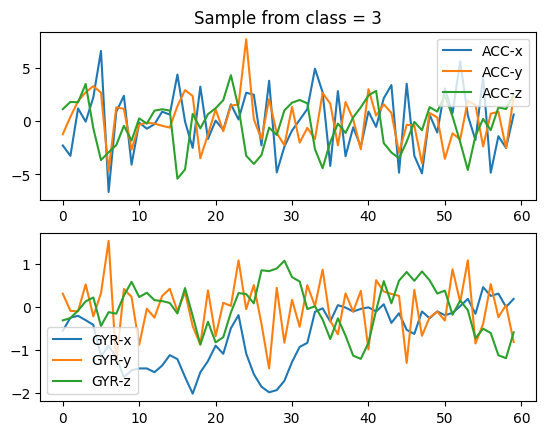

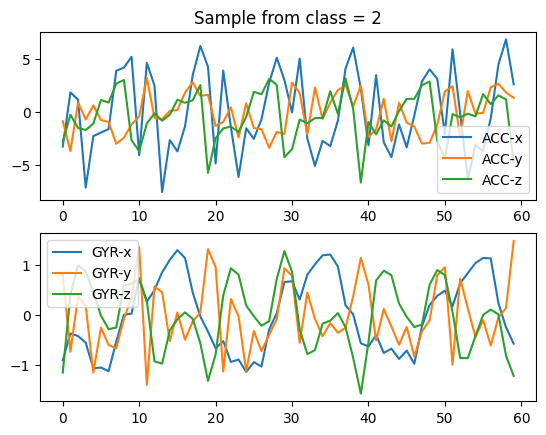

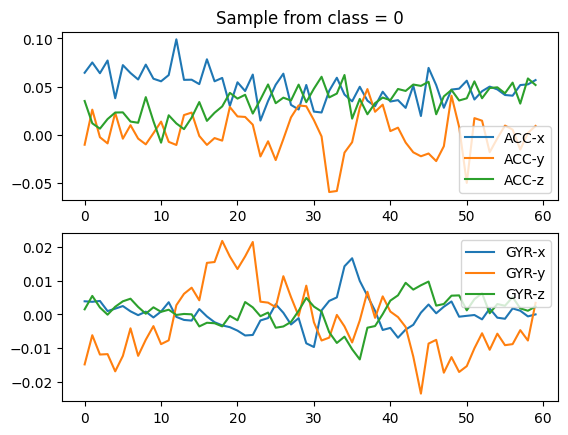

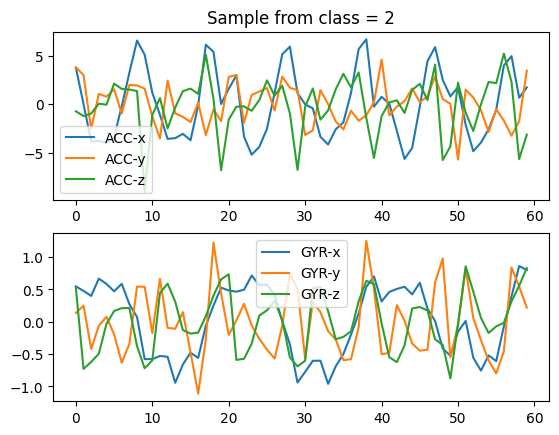

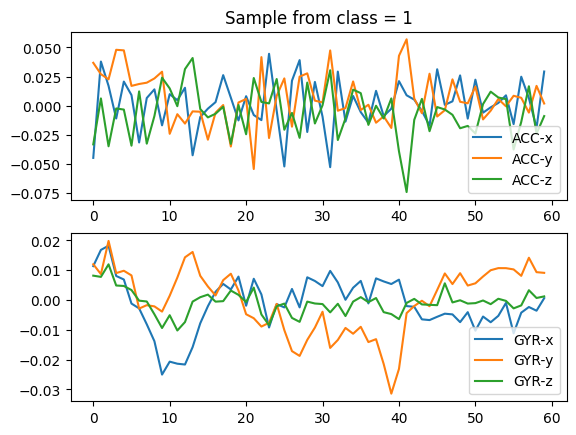

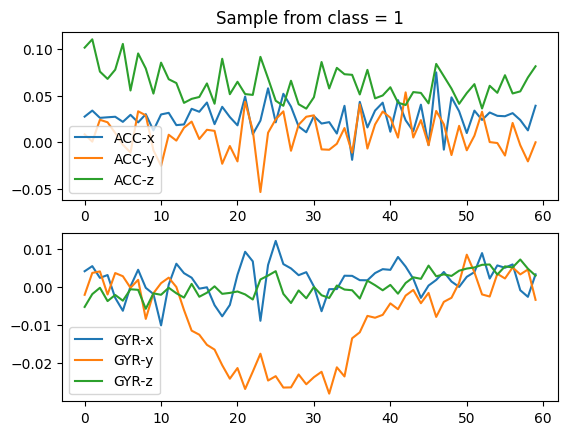

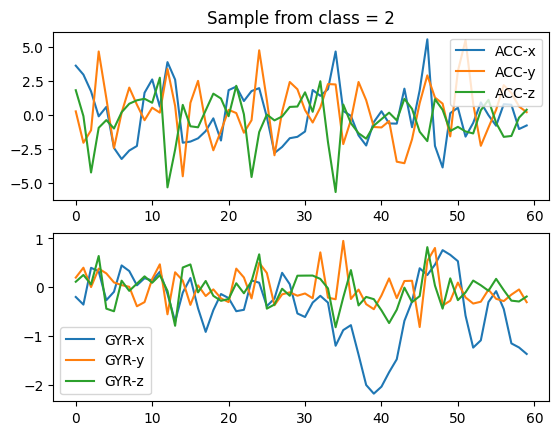

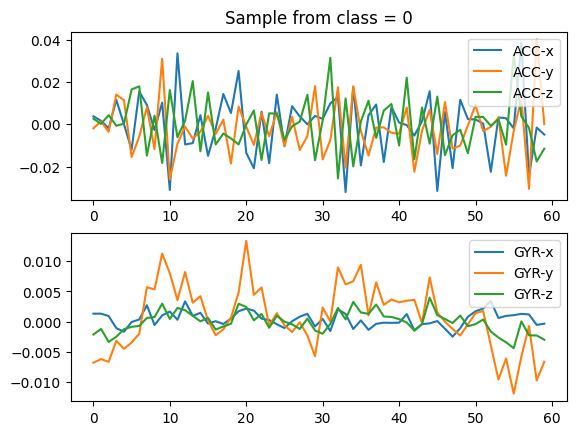

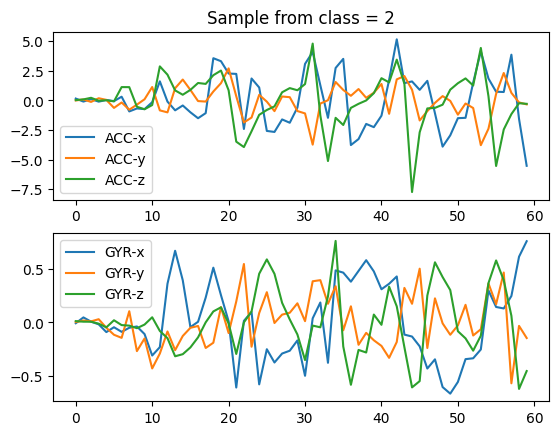

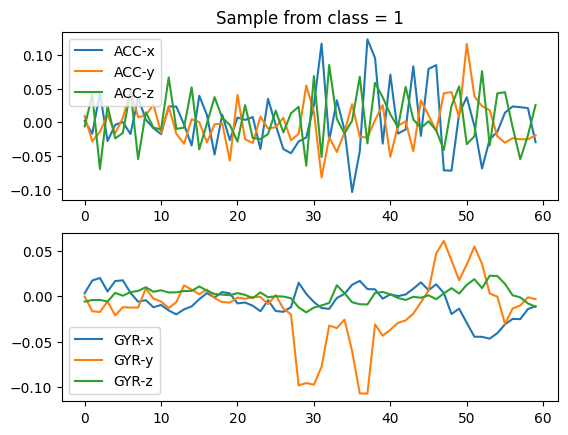

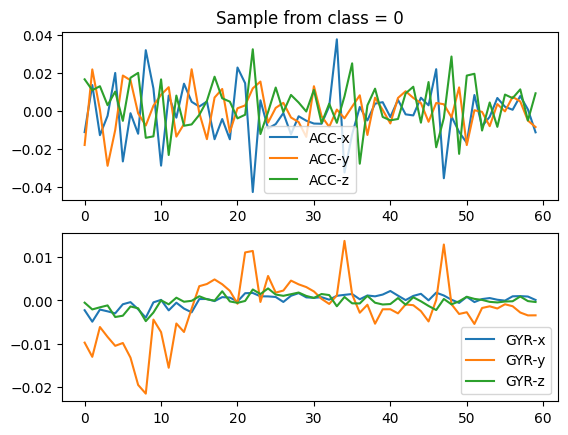

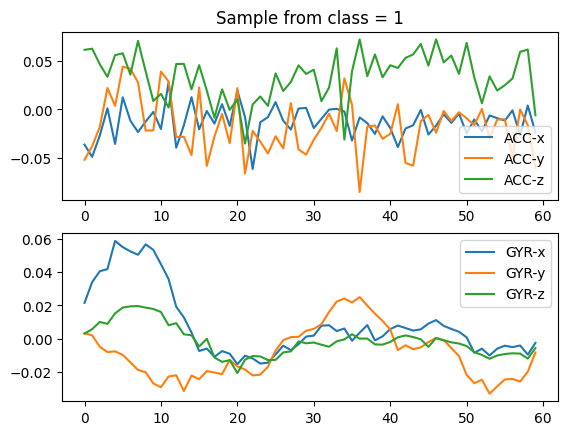

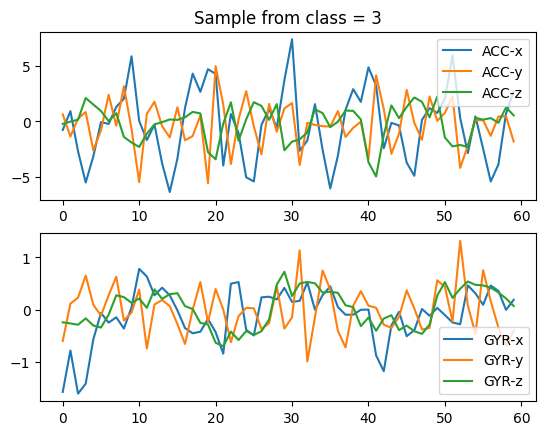

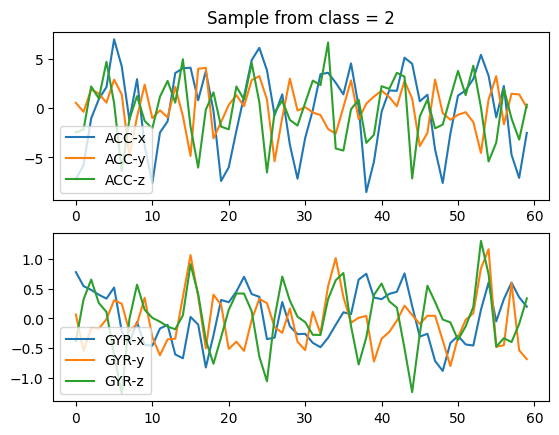

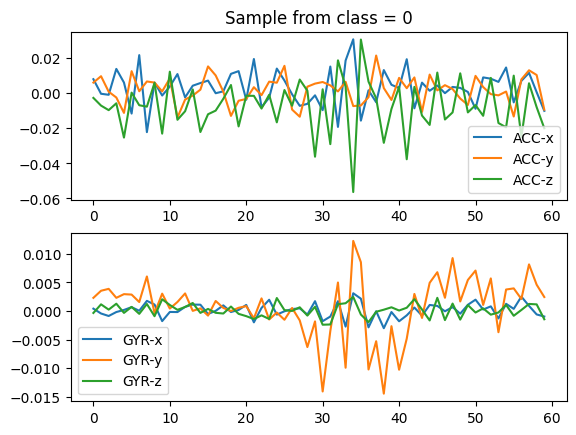

-- Batch --


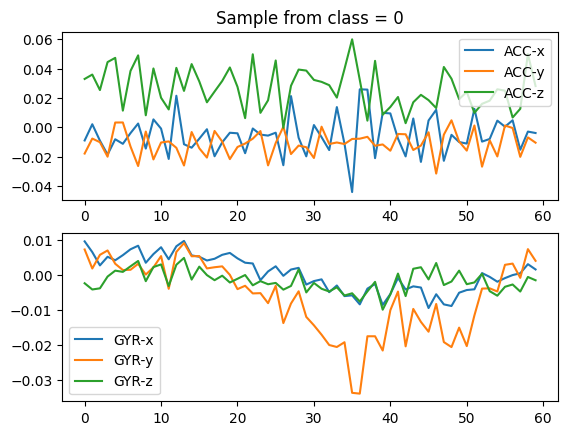

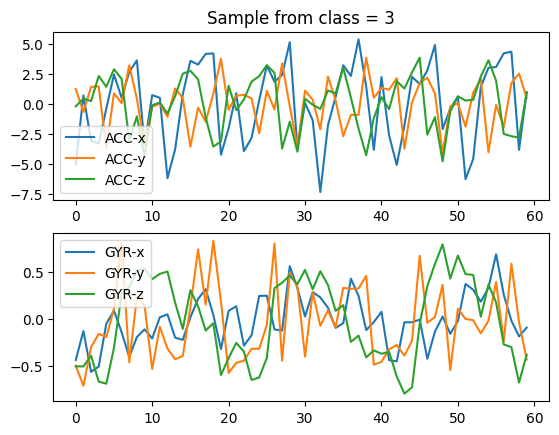

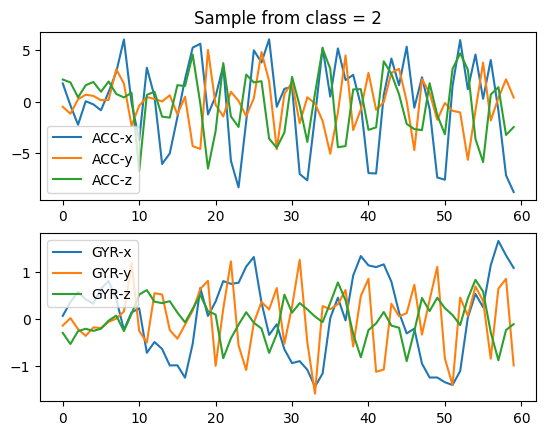

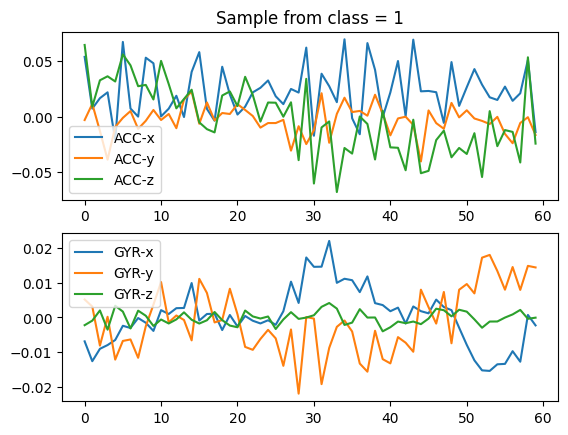

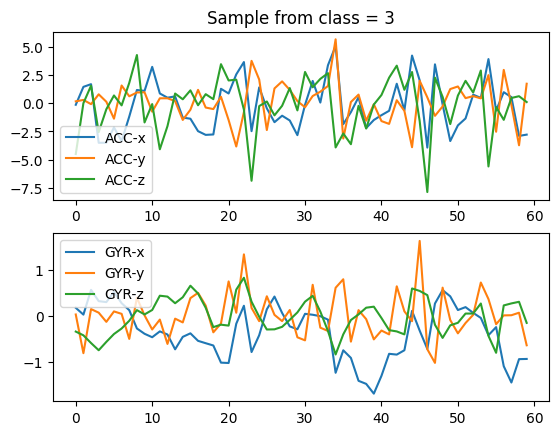

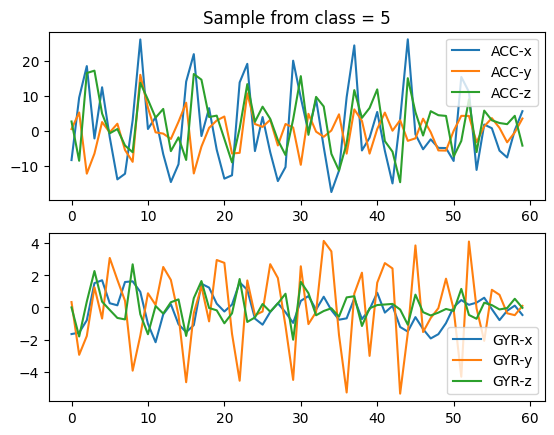

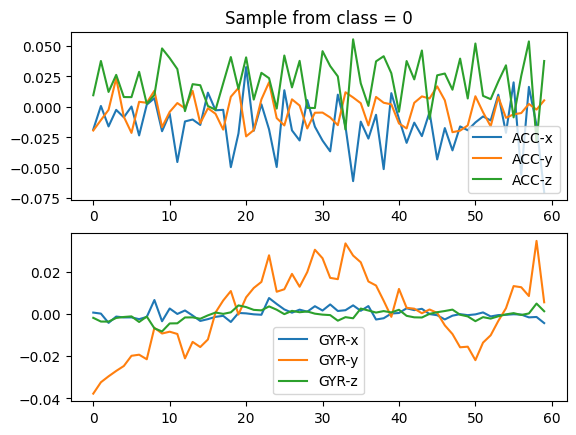

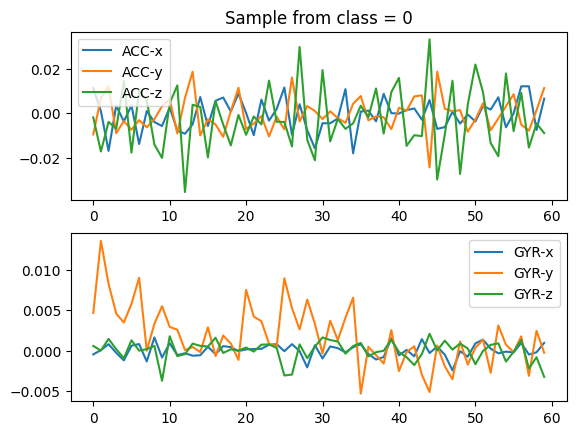

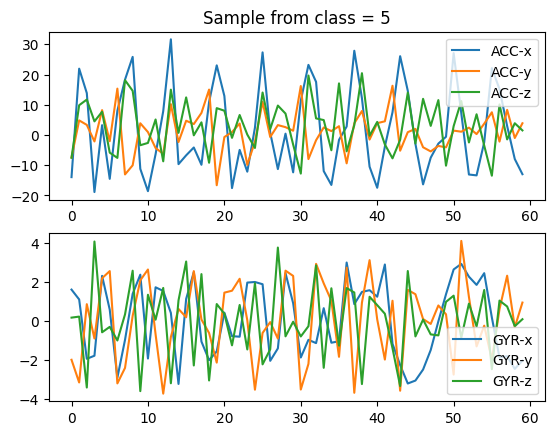

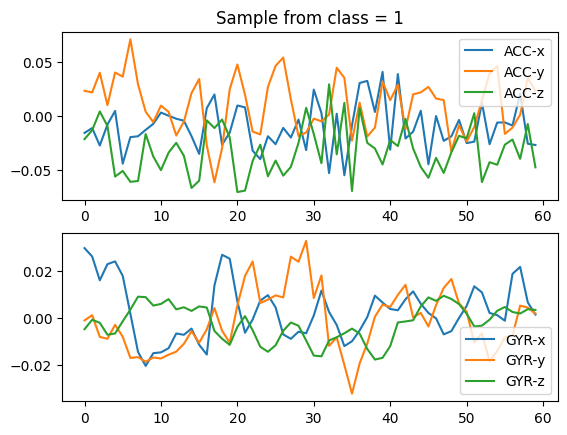

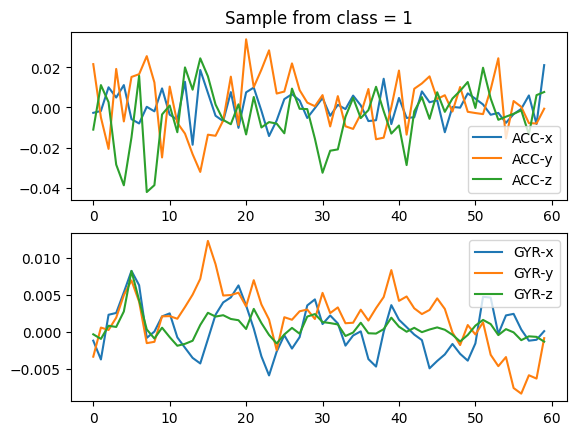

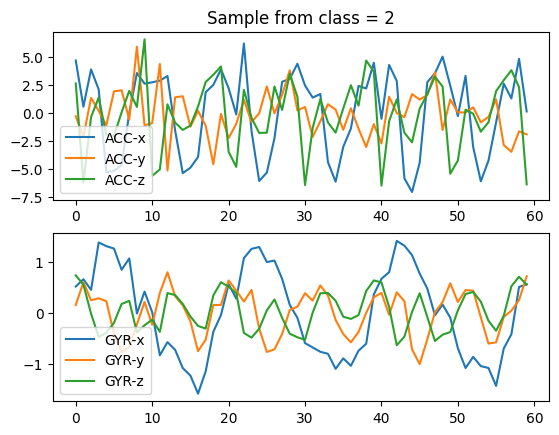

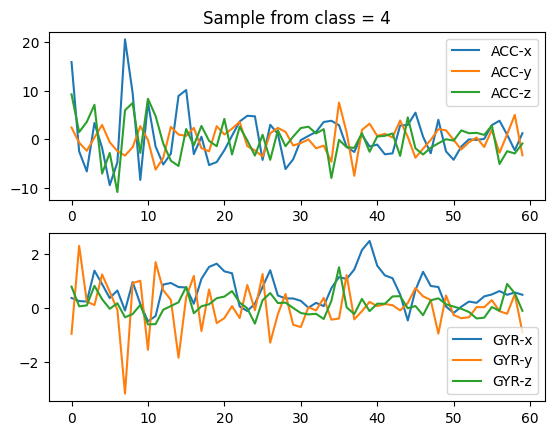

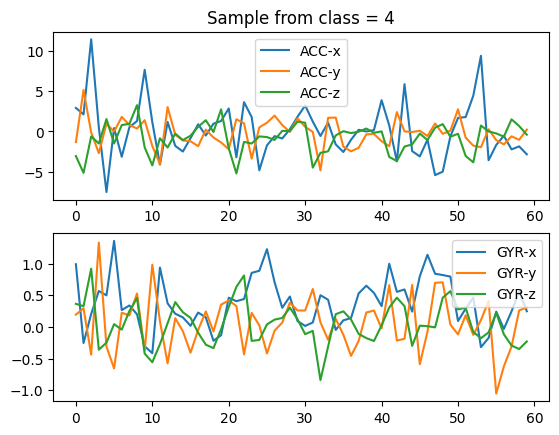

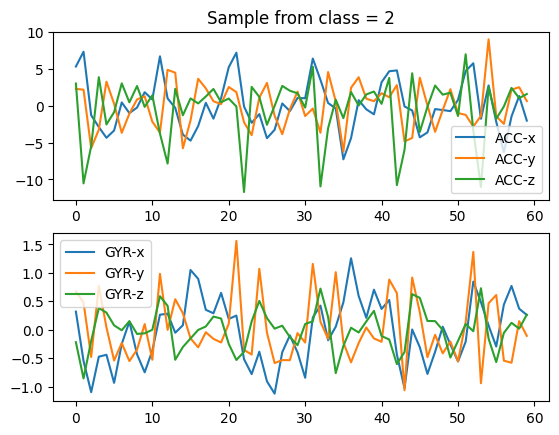

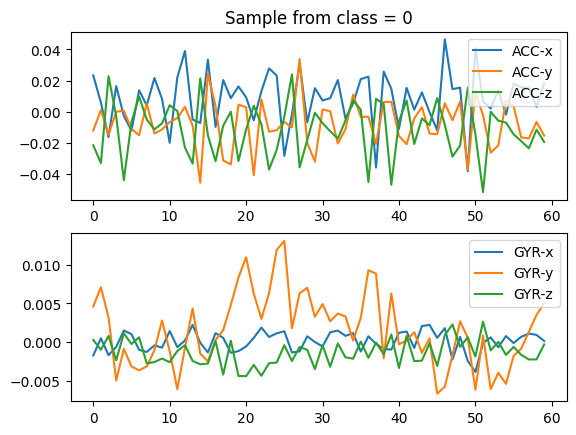

-- Batch --


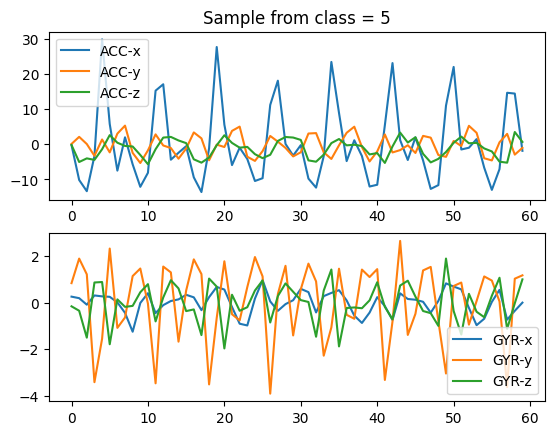

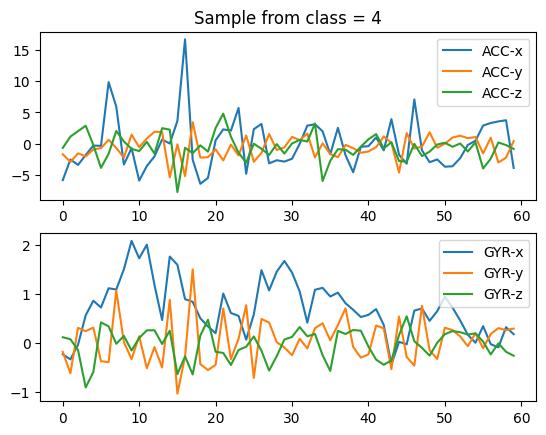

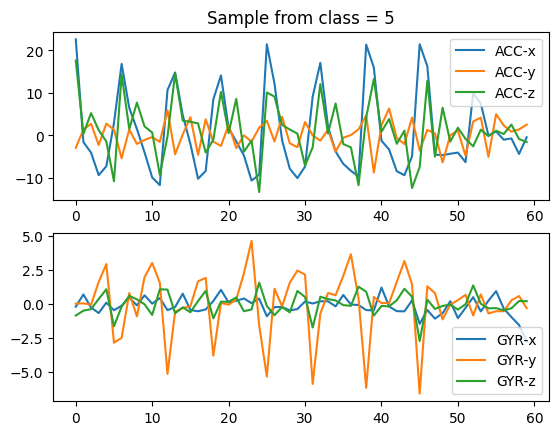

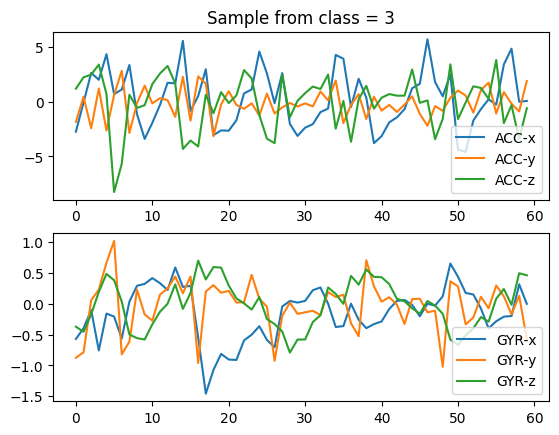

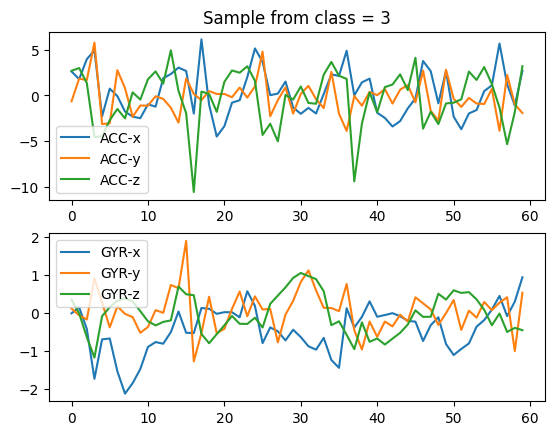

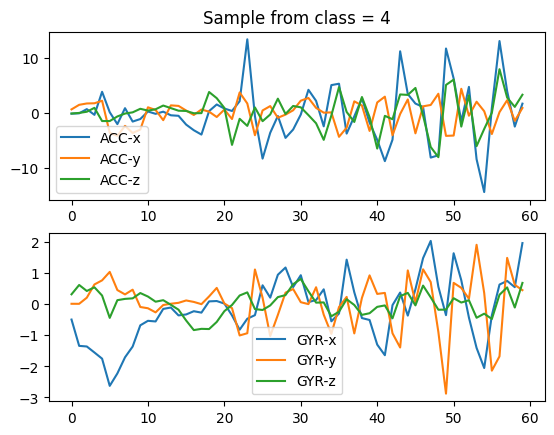

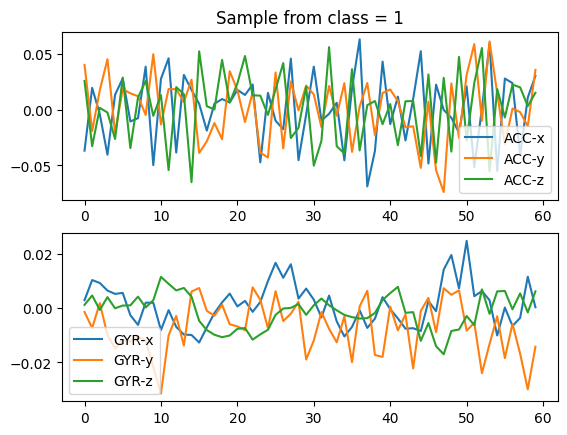

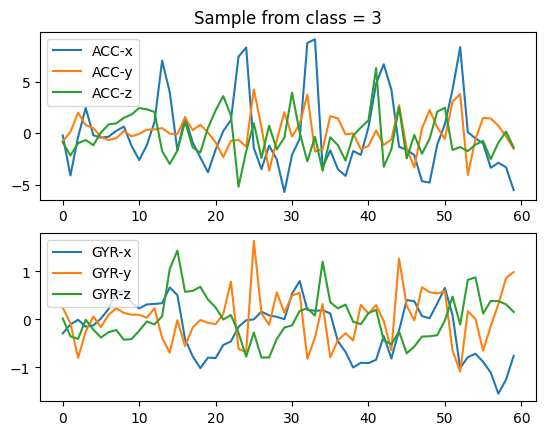

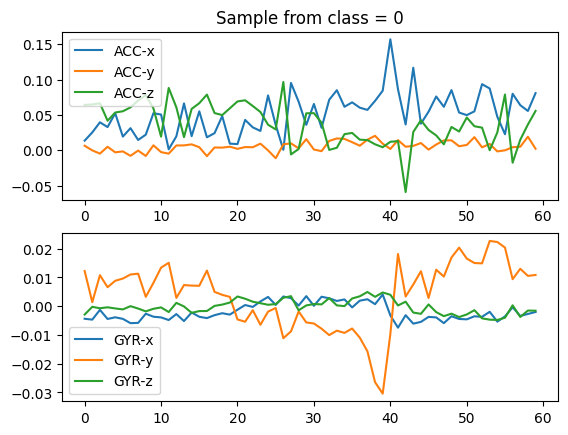

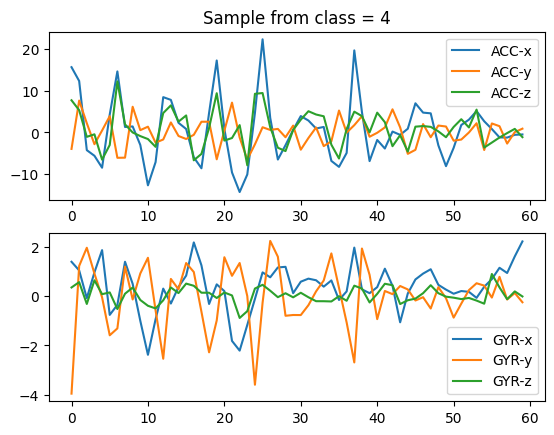

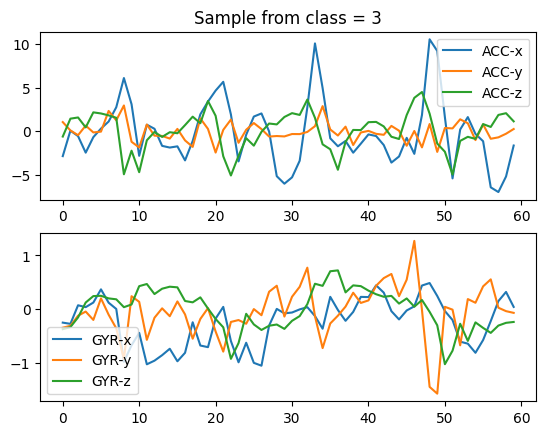

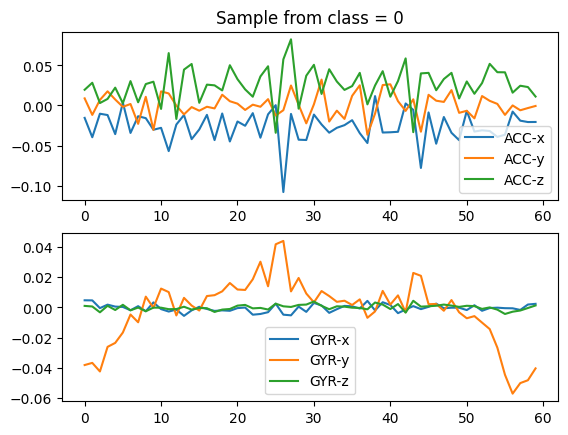

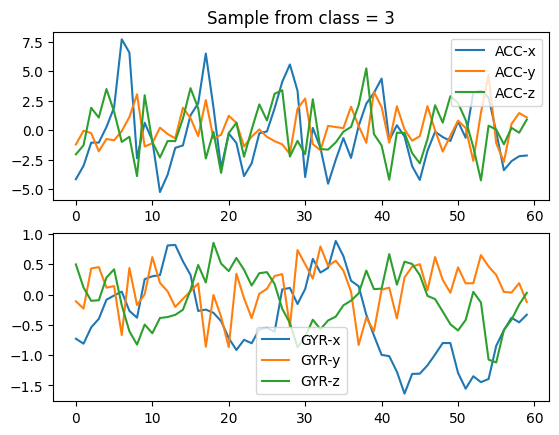

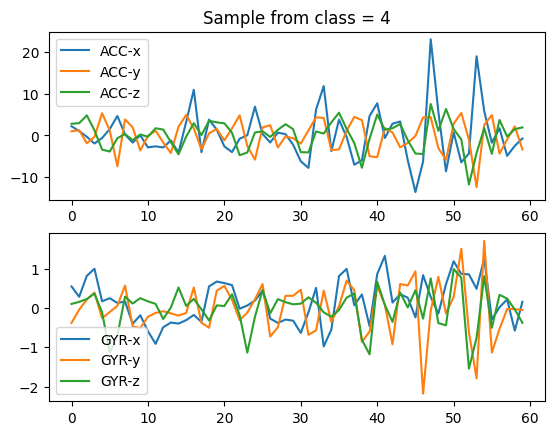

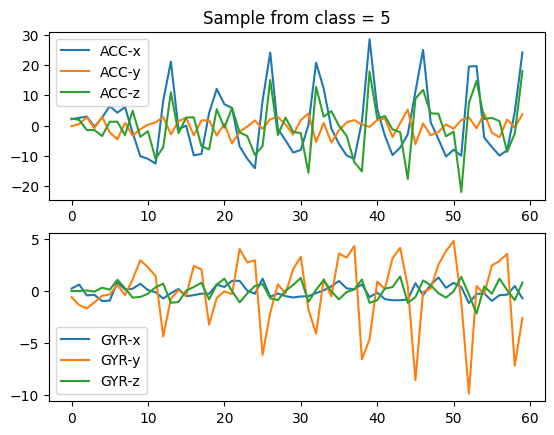

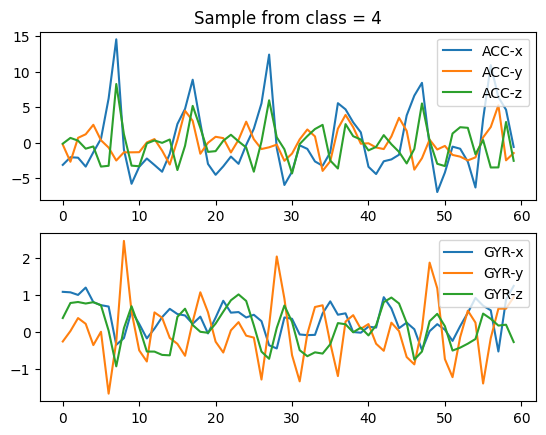

-- Batch --


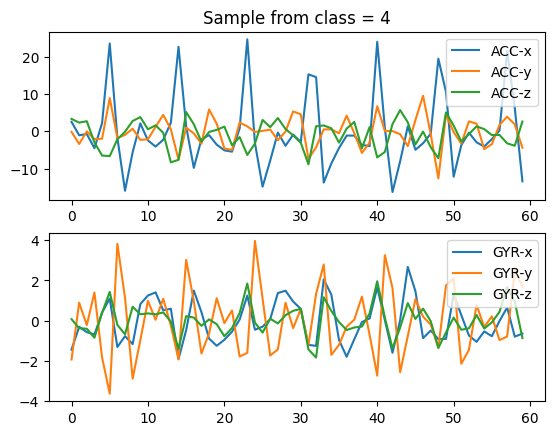

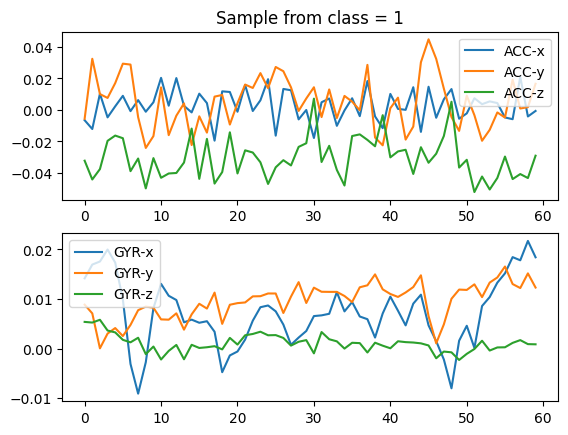

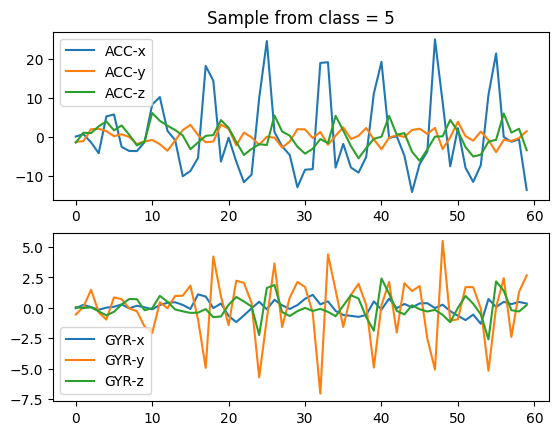

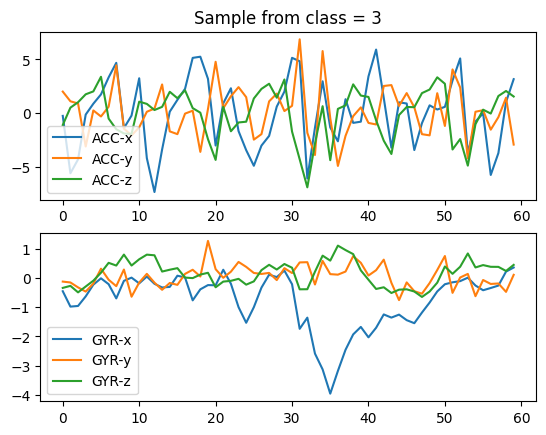

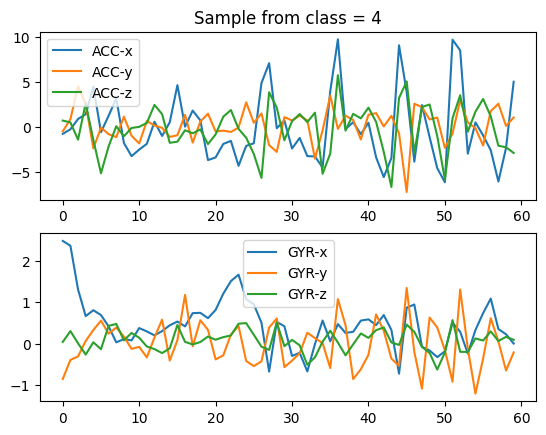

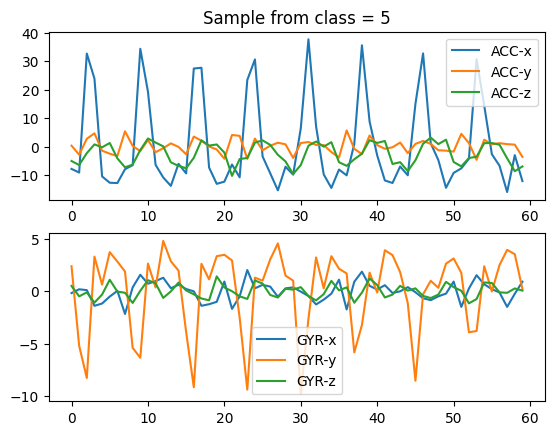

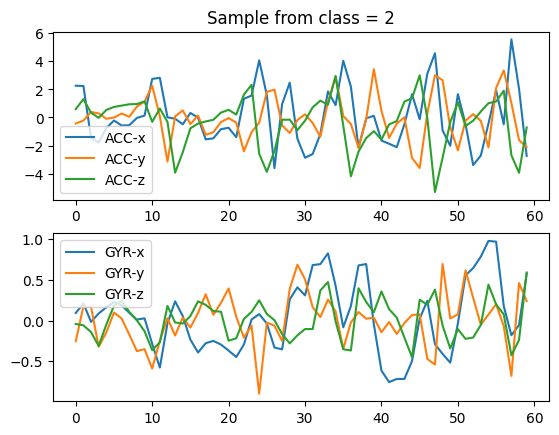

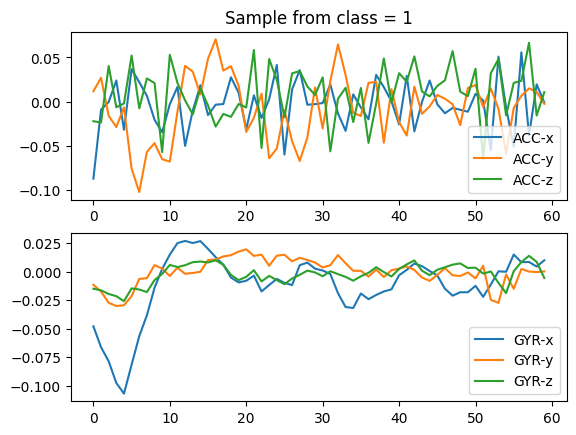

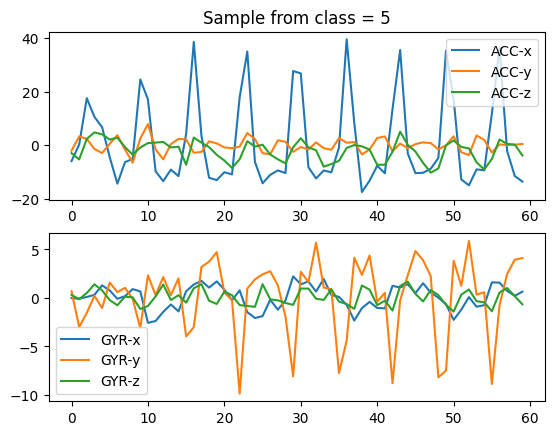

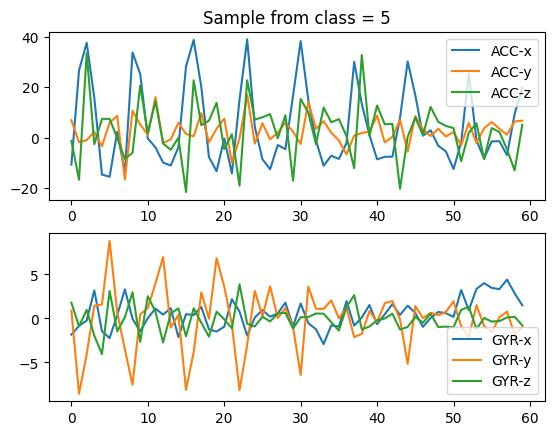

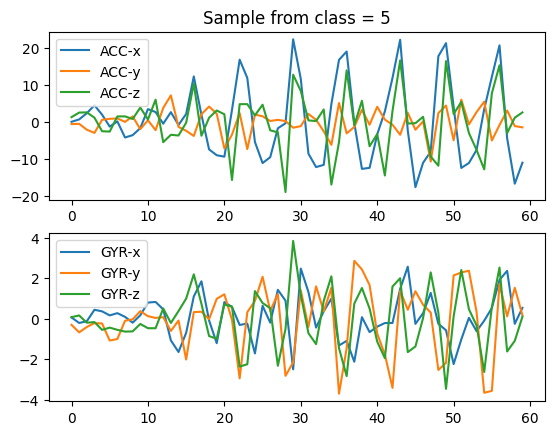

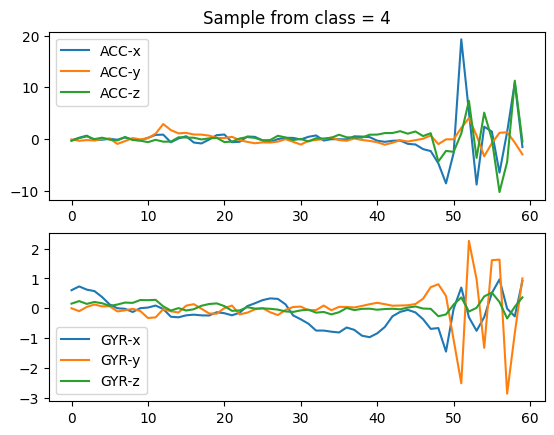

In [16]:
for batch in train_dl:
    print("-- Batch --")
    X,y = batch
    for Xi, yi in zip(X,y):
        Xi_np = Xi.cpu().numpy().reshape((6,-1)) # Convert to Numpy and reshape.
        plot_sample(Xi_np, yi)